<a href="https://colab.research.google.com/github/imviswa4u/testing/blob/Bituminous-Materials/toughness_tenacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Releavnt Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

## Defining Area Calculation Functions for Toughness and Tenacity

In [2]:
def tuff(data_trim,i):
  final_data["Toughness (N-mm)"][i] = metrics.auc(data_trim["Extension "], data_trim["Load "])

def tenc(data_trim,i):
  final_data["Tenacity (N-mm)"][i] = metrics.auc(data_trim["Extension "], data_trim["Load "])

##Importing Data

In [3]:
xls = pd.ExcelFile('/content/toughness_tenacity.xlsx')
df0 = pd.read_excel(xls, 'CTRL')
df1 = pd.read_excel(xls, 'aMBx')
df2 = pd.read_excel(xls, 'ASOR-I')
df3 = pd.read_excel(xls, 'ASOR-II')
df4 = pd.read_excel(xls, 'aMLx')
string = ["CTRL","aMBx","ASOR1","ASOR2","aMLx"]
final_data = pd.DataFrame(index=string,columns=["Toughness (N-mm)","Tenacity (N-mm)"])

## Appending area calculations and Plotiing Complete Graphs

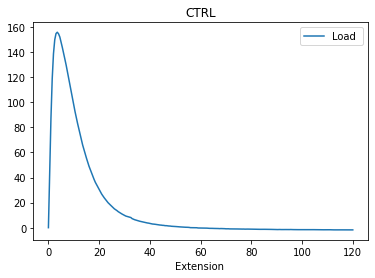

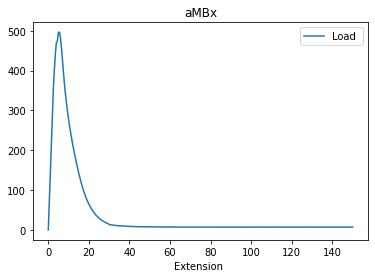

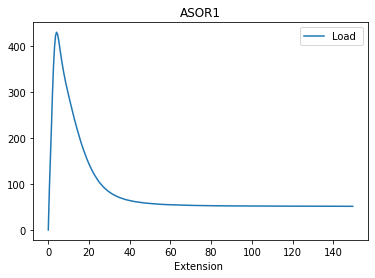

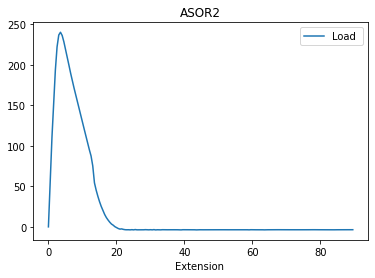

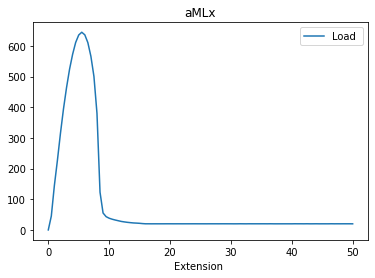

In [4]:
count = 0
for data in (df0, df1, df2, df3, df4):
  data_trim = []
  data_trim = data.iloc[:,[2,3]]
  data_trim = data_trim.replace(to_replace="mm",value = 0)
  data_trim = data_trim.replace(to_replace="N",value = 0)
  tuff(data_trim,count)

  idx = pd.to_numeric(data_trim["Load "]).idxmax()
  dff = data_trim.iloc[idx:,]
  tenc(dff,count)

  data_trim.plot(x='Extension ', y='Load ')
  plt.title(string[count])
  count += 1
  plt.show()

## Plotting Graphs after Normal line to the Tangent of the Peak Value

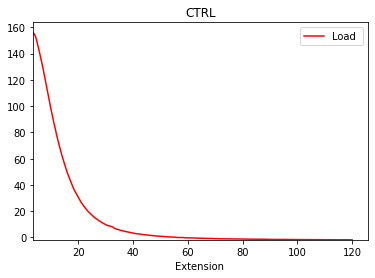

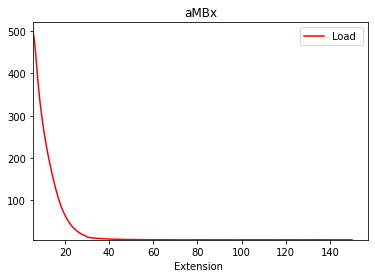

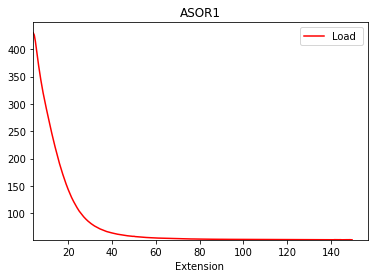

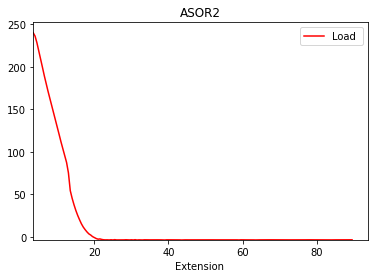

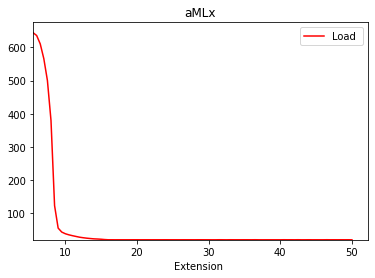

In [5]:
count = 0
for data in (df0, df1, df2, df3, df4):
  data_trim = []
  data_trim = data.iloc[:,[2,3]]
  data_trim = data_trim.replace(to_replace="mm",value = 0)
  data_trim = data_trim.replace(to_replace="N",value = 0)
  idx = pd.to_numeric(data_trim["Load "]).idxmax()
  dff = data_trim.iloc[idx:,]
  dff.plot(x='Extension ', y='Load ',color='red')
  plt.xlim(dff.iloc[0,0])
  plt.ylim(dff.iloc[-1,-1])
  plt.title(string[count])
  count += 1
  plt.show()

## Final Area Results

In [6]:
final_data["Difference"] = final_data["Toughness (N-mm)"] - final_data["Tenacity (N-mm)"]
final_data.astype(float).round(3)

,Toughness (N-mm),Tenacity (N-mm),Difference
CTRL,2002.191,1615.998,386.192
aMBx,6283.592,4474.726,1808.867
ASOR1,12946.676,11867.572,1079.104
ASOR2,1968.139,1421.181,546.958
aMLx,4592.162,2464.254,2127.908


## Tangent and Normal Trials

In [7]:
# x = data_trim["Extension "]
# y = data_trim["Load "]

# idx = pd.to_numeric(data_trim["Load "]).idxmax()
# x0 = x[idx]
# y0 = y[idx]

# # Compute the slope of the tangent at the chosen point
# dy_dx = (y[idx+1] - y[idx-1]) / (x[idx+1] - x[idx-1])

# # Define a small interval around the chosen point to draw the tangent line
# x_range = np.array([x0 - 5, x0 + 20])
# y_range = y0 + dy_dx * (x_range - x0)

# m = -1 / dy_dx

# # Define a small interval around the chosen point to draw the normal line
# y_range_normal = y0 + m * (x_range - x0)


# # Plot the line plot and the tangent line
# plt.plot(x, y, label='Load')
# plt.plot(x_range, y_range, label='Tangent', linestyle='--')

# # Plot the normal line
# plt.plot(x_range, y_range_normal, label='Normal', linestyle='-.')

# plt.xlim(-5,)
# plt.ylim(0,)
# plt.legend()
# plt.show()